# Insight 18B Data Challenge 1

__Notes about this assignment:__  

*Time limit = 4 hours*  

**Goal: Develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.**  

Some important questions to think about are:  
* How can you best explore the data?  
* Why did you select your particular model?  
* How did you validate your model?  
* What insights can you derive from your results?  

**Variables in Dataset**: 
* id number  
* Clump Thickness: 1 - 10  
* Uniformity of Cell Size: 1 - 10  
* Uniformity of Cell Shape: 1 - 10  
* Marginal Adhesion: 1 - 10  
* Single Epithelial Cell Size: 1 - 10  
* Bare Nuclei: 1 - 10  
* Bland Chromatin: 1 - 10  
* Normal Nucleoli: 1 - 10  
* Mitoses: 1 - 10  
* Class: (2 for benign, 4 for malignant)

In [20]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
#import plotly.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.cross_validation import train_test_split , StratifiedKFold

In [21]:
# Import data and add column names: 
# id number
# Clump Thickness: 1 - 10
# Uniformity of Cell Size: 1 - 10
# Uniformity of Cell Shape: 1 - 10
# Marginal Adhesion: 1 - 10
# Single Epithelial Cell Size: 1 - 10
# Bare Nuclei: 1 - 10
# Bland Chromatin: 1 - 10
# Normal Nucleoli: 1 - 10
# Mitoses: 1 - 10
# Class: (2 for benign, 4 for malignant)

df_raw = pd.read_csv('breast-cancer-wisconsin.csv', 
                     names = ['id', 'thickness', 'uni_size', 'uni_shape',
                              'adhesion', 'epi_size', 'bare_nuc', 
                              'bland_chrom', 'norm_nuc', 'mitoses', 
                              'class'])
df_raw.head()

,id,thickness,uni_size,uni_shape,adhesion,epi_size,bare_nuc,bland_chrom,norm_nuc,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Inspect and explore variables

In [5]:
print(df_raw.shape)
df_raw.describe()

(699, 11)


,id,thickness,uni_size,uni_shape,adhesion,epi_size,bland_chrom,norm_nuc,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df_raw.describe(include='O')

,bare_nuc
count,699
unique,11
top,1
freq,402


In [22]:
# MAke copy of df
df = df_raw
df.dtypes

id              int64
thickness       int64
uni_size        int64
uni_shape       int64
adhesion        int64
epi_size        int64
bare_nuc       object
bland_chrom     int64
norm_nuc        int64
mitoses         int64
class           int64
dtype: object

## Fix some of the variables  
* Recode '?' to nan for **bare_nuc** variable.  
* Recode **class** variable to be 1s and 0s.

In [23]:
df['bare_nuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [24]:
# There appears to be a question mark. Coerce to float so
# the question mark becomes NaN.
df[['bare_nuc']] = df[['bare_nuc']].apply(pd.to_numeric, errors='coerce')
print(df['bare_nuc'].unique())
df.describe()

[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]


,id,thickness,uni_size,uni_shape,adhesion,epi_size,bare_nuc,bland_chrom,norm_nuc,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [25]:
#### Recode class as 0 (benign) and 1 (malignant): (because that makes
# more sense and also intercept will make sense if I decide to go the 
# logistic regression route)
df.loc[df['class'] < 3, 'class'] = 0
df.loc[df['class'] > 3, 'class'] = 1

## Explore predictor (X) variables
It is always good practice to visualize your variables before running any models. A histogram plot will help me get a sense for the distribution of the variables.  

In [26]:
def plot_histograms( df , variables , n_rows , n_cols ):
    '''
    Plot histogram of specified variables in grid.
    '''
    fig = plt.figure( figsize = ( 16 , 24 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( str( var_name ) )
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

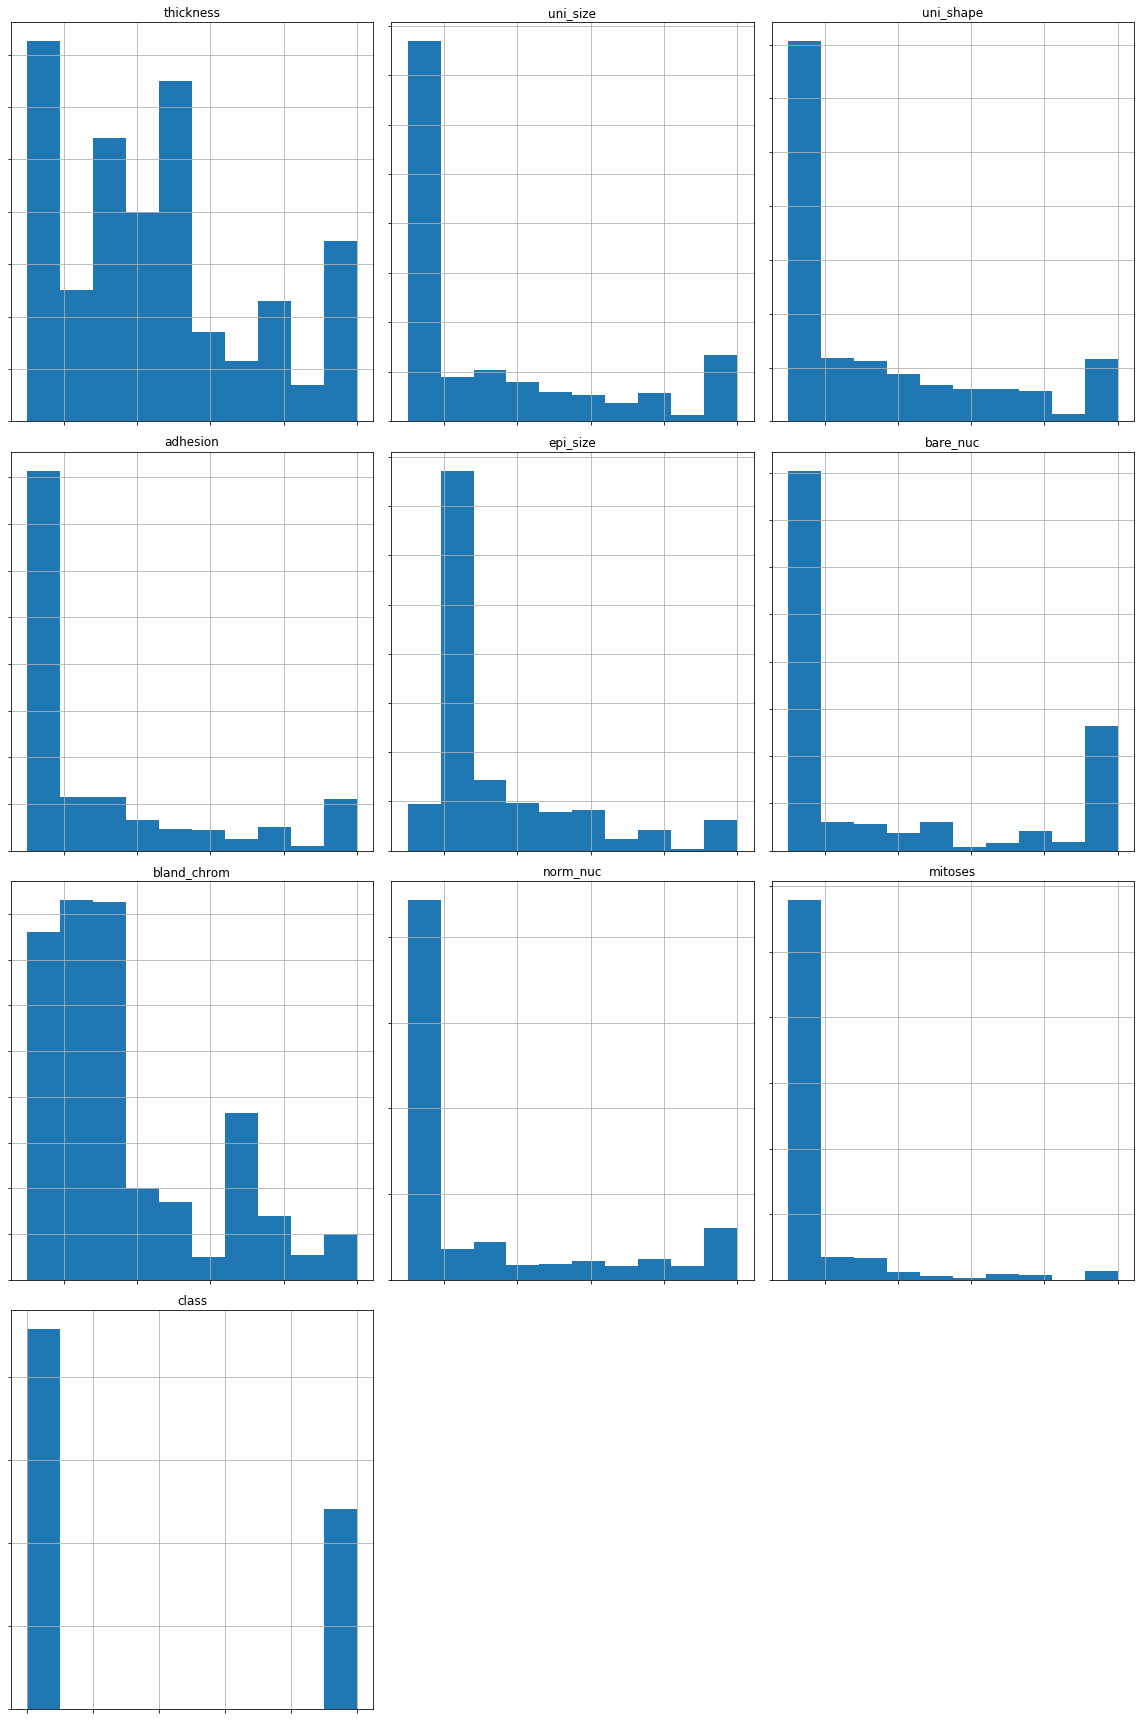

In [11]:
plot_histograms(df, ['thickness', 'uni_size', 'uni_shape',
                        'adhesion', 'epi_size', 'bare_nuc',
                    'bland_chrom', 'norm_nuc', 'mitoses', 
                    'class'], 4, 3)

In [12]:
### What percentage of observations belong to classes 1 and 0?
df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

#### Some problems with the data thus far: 
* Almost all variables are skewed.  
* Class imbalance is not severe for `class`, although it might be something to consider when weighing different model performance metrics later on.    
* `bare_nuc` variable is missing 16 observations. (This is such a small percentage of the total number of observations, that it doesn't really matter.)   

## Handling Missing Data
As stated above, the `bare_nuc` variable is missing 16 data points. I decided to **replace missing values** with with **mode** `bare_nuc` value (i.e., 1 or 2) - this variable is so skewed that using the mean or median is not ideal. There are fancier ways of imputing missing values; however, with only 16 data points missing, I decided to keep it basic. 

In [27]:
# Impute missing bare_nuc values: set missing to mode
from statistics import mode
df['bare_nuc'] = df['bare_nuc'].fillna(mode(df['bare_nuc']))

## Split Data into Test and Training Datasets:
**Training-Test Split**: 80% Training, 20% Test

In [28]:
# Create training and testing datasets
# (Note: can feed it multiple datasets at once as long as they all have same number of rows)
# (specifying random_state ensures that you'll be able to recreate the same test set each time you rerun code)
df_train, df_test = train_test_split(df, 
                                     test_size = 0.2,
                                     random_state=156)

### Make combined dataset to facilitate applying variable changes to both datasets
df_full = df_train.append(df_test, ignore_index = True) 
#df_train = df_full[:(len(data_split_train))] # Training data set

print(df_train.shape, df_test.shape, df_full.shape)


(559, 11) (140, 11) (699, 11)


## Return to Variable Exploration
Look at the correlations among the variables.

In [10]:
import seaborn as sns

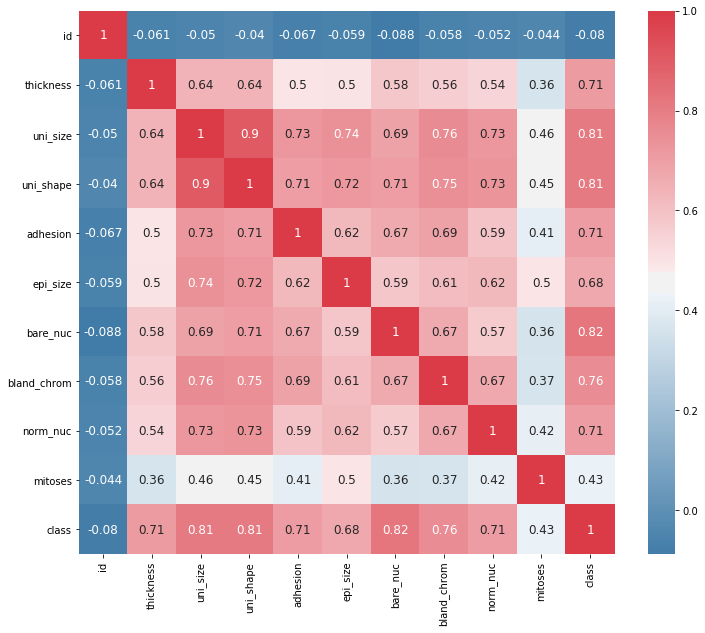

In [16]:
ax = plt.subplots( figsize =(12, 10) ) # change plot size
sns.heatmap(df_train.corr(), # correlation matrix of all vars in df_train
           annot=True, # add labels to matrix
           cmap = sns.diverging_palette(240, # change colors to blue and red
                                        10, 
                                        as_cmap=True),
            annot_kws = { 'fontsize' : 12 } # font size
           )

**Notes about Correlations:**  

**Multicollinearity** seems to be fairly prevalent in this dataset. e.g., `uni_shape` and `uni_size` are correlated at .9. Typically, high multicollinearity among features in a logistic regression can result in the model assigning unreliable beta-weights (or importances) to features. However, the goal here is only to predict the presence of cancer based on the properties of the cell - we don't actually need to know which cell properties are the most important predictors. Thus, a **logistic regression** model is a viable option, given that we only want to accurately predict the presence of cancer.  


### Data Visualization
I chose to plot a few of the variables that had divergent distributions and that aren't super highly correlated.   
**Conclusion:** From these plots, we can tell that there is a fairly large effect size (i.e., some of the variables seem to be highly predictive of whether or not there is cancer or not). 

In [27]:
def plot_kde_distribution( df , var , target , **kwargs ):
    '''
    This is a very general plotting function that makes kde distribution
        plots for each level of target.
    var = x-axis distribution variable
    target = categorical levels to plot seperate (overlayed) distributions.
    '''
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , 
                          hue=target , 
                          aspect=4 , # aspect ratio of plot
                          row = row , 
                          col = col )
    facet.map( sns.kdeplot , var , shade= True ) 
        # kdeplot = kernel density estimate
    facet.set(xlim = (df[var].min(), df[var].max()))
    facet.add_legend()

In [1]:
def plot_histogram( df , x_var , class_var ):
    '''
    Plot histogram distribution across VAR at each level of TARGET.
    '''
    for i in df[class_var].unique(): 
        sns.distplot(df.loc[df[class_var] == i][x_var], kde=False)
    plt.show()

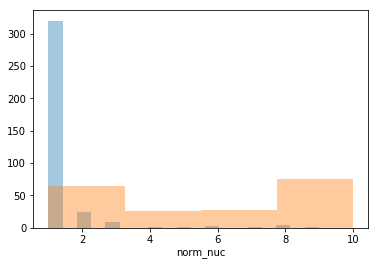

In [18]:
plot_histogram(df_train, x_var='norm_nuc', class_var='class')

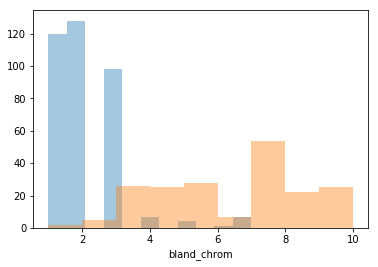

In [19]:
plot_histogram(df_train, x_var='bland_chrom', class_var='class')

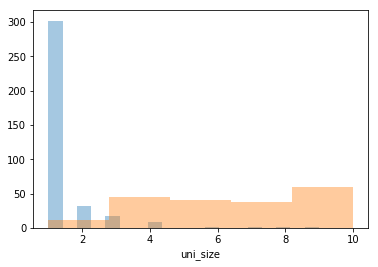

In [20]:
plot_histogram(df_train, x_var='uni_size', class_var='class')

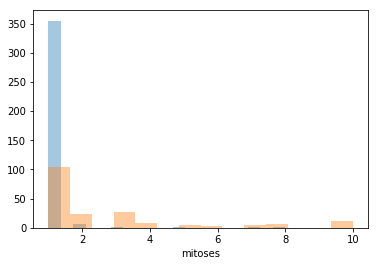

In [21]:
plot_histogram(df_train, x_var='mitoses', class_var='class')

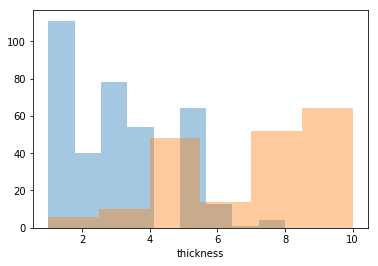

In [22]:
plot_histogram(df_train, x_var='thickness', class_var='class')

#### Summary of visualizations: 
It's fairly apparent already that these features are doing a good job of predicting cancer vs. non-cancer cells.  
**Feature Engineering:** I would typically consider feature engineering at this point. However, I think for now, I will see how the model performs without engineered features, and then add engineered features later if need be.  

# Modeling

## Modeling Approach and Considerations
* **Small Number of Observations:** Because there are a small number of data points (*N* = 699), **overfitting** is a concern. For this reason, I will start with a **logistic regression** model.  
* **High Multicollinearity:** Note that the feature importances (or Beta-weights) will be less interpretable because of the high level of multicollinearity.   

## Model Preparation
- First split up the training set into training and validation sets

In [56]:
### Split Training set into Training and Validation sets

### Train/Validate:
y_train_valid = df_train['class']
X_train_valid = df_train.drop(['class', 'id'], axis=1)

### Test datasets:
y_test = df_test['class']
X_test = df_test.drop(['class', 'id'], axis=1)

### Make validation and training datasets: 
train_X , valid_X , train_y , valid_y = train_test_split(X_train_valid, 
                                                         y_train_valid, 
                                                         test_size = .2, 
                                                        random_state=88)
print(df_train.shape, X_test.shape, train_X.shape, 
      valid_X.shape, train_y.shape, valid_y.shape)


(559, 11) (140, 9) (447, 9) (112, 9) (447,) (112,)


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
# Fit training data
model_logreg = LogisticRegression().fit(train_X, train_y)

# Compare accuracy of model on training and validation data sets:
print('Training set score: {:.5f}'.format(model_logreg.score(train_X, train_y)))
print('Validation set score: {:.5f}'.format(model_logreg.score(valid_X, valid_y)))

Training set score: 0.96421
Validation set score: 0.96429


Because the accuracy scores of the model on training and validation sets are so close, I am concerned that the model is **underfitted** to the data. I will try to allow a more flexible model to see if that increases accuracy. 

In [52]:
# Fit training data and alter regularization parameters of model so that it is more flexible: 
model_logreg_c10 = LogisticRegression(C = 10).fit(train_X, train_y)
print('Training set score: {:.5f}'.format(model_logreg_c10.score(train_X, train_y)))
print('Validation set score: {:.5f}'.format(model_logreg_c10.score(valid_X, valid_y)))

Training set score: 0.96644
Validation set score: 0.96429


In [ ]:
### Super cool functions: 

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
